In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError
from sklearn.metrics import r2_score
import seaborn as sns

In [20]:
# Load the dataset
df = pd.read_csv('dataset3.csv')

In [21]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['Tomato Status'] = label_encoder.fit_transform(df['Tomato Status'])
df['Season'] = label_encoder.fit_transform(df['Season'])


In [28]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Print the correlation matrix
print(corr_matrix)

                 Ethylene Level  Temperature  Humidity  Tomato Status  \
Ethylene Level         1.000000     0.137924  0.079729      -0.140837   
Temperature            0.137924     1.000000  0.429312      -0.021858   
Humidity               0.079729     0.429312  1.000000       0.083513   
Tomato Status         -0.140837    -0.021858  0.083513       1.000000   
Season                -0.265491    -0.353718 -0.632225      -0.032165   
Days to harvest       -0.636613    -0.124295  0.070664       0.228535   

                   Season  Days to harvest  
Ethylene Level  -0.265491        -0.636613  
Temperature     -0.353718        -0.124295  
Humidity        -0.632225         0.070664  
Tomato Status   -0.032165         0.228535  
Season           1.000000         0.120947  
Days to harvest  0.120947         1.000000  


C:\Users\Deepakraj\AppData\Local\Temp\ipykernel_7012\1560766323.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


Correlation Matrix:
                  Ethylene Level  Temperature  Humidity  Tomato Status  \
Ethylene Level         1.000000     0.137924  0.079729      -0.140837   
Temperature            0.137924     1.000000  0.429312      -0.021858   
Humidity               0.079729     0.429312  1.000000       0.083513   
Tomato Status         -0.140837    -0.021858  0.083513       1.000000   
Season                -0.265491    -0.353718 -0.632225      -0.032165   
Days to harvest       -0.636613    -0.124295  0.070664       0.228535   

                   Season  Days to harvest  
Ethylene Level  -0.265491        -0.636613  
Temperature     -0.353718        -0.124295  
Humidity        -0.632225         0.070664  
Tomato Status   -0.032165         0.228535  
Season           1.000000         0.120947  
Days to harvest  0.120947         1.000000  


<Axes: >

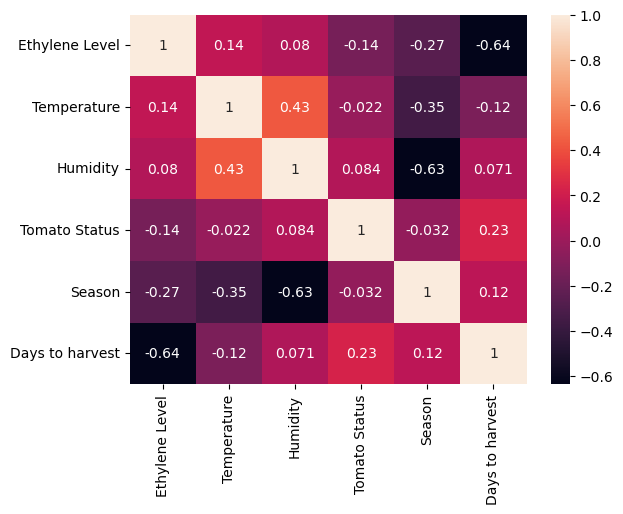

In [30]:
# Print the correlation matrix
print("Correlation Matrix:\n", corr_matrix)

# Display the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True)


In [22]:
# Split the dataset into training and testing sets
X = df.drop(['Days to harvest', 'Date'], axis=1)
y = df['Days to harvest']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Create a neural network model
model = Sequential()
model.add(Dense(64, input_shape=(5,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))


In [24]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mean_squared_error',
              metrics=[MeanSquaredError(), MeanAbsoluteError()])


In [25]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=0)

In [27]:
# Evaluate the model
mse, _, mae = model.evaluate(X_test, y_test, verbose=0)
# Evaluate the model on the test set
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print(f"R2 Score: {r2}")

3/3 [==============================] - 0s 1ms/step
Mean Squared Error: 232.5611572265625
Mean Absolute Error: 12.350967407226562
R2 Score: 0.6594304304440877


In [16]:
# Create a new input for prediction
new_input = np.array([[78, 26, 20, 6,0]])

# Make a prediction on the new input
prediction = model.predict(new_input)

print("Days to Harvest:", prediction[0][0])

1/1 [==============================] - 0s 14ms/step
Days to Harvest: 7.4059315


In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values for Random Forest model
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Model')
plt.show()

# Scatter plot of actual vs predicted values for ANN model
plt.scatter(y_test, model.predict(X_test))
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('ANN Model')
plt.show()


In [ ]:
# Histogram of residuals for Random Forest model
plt.hist(y_test - y_pred)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Random Forest Model')
plt.show()

# Histogram of residuals for ANN model
plt.hist(y_test - model.predict(X_test))
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('ANN Model')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Plot MSE for both models
plt.bar(['Random Forest', 'ANN'], [mse_rf, mse_ann])
plt.title('MSE Comparison')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.show()


In [ ]:
# Plot actual vs predicted values for test set in random forest model
plt.scatter(y_test, y_pred_rf)
plt.title('Actual vs. Predicted (Random Forest)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# Plot actual vs predicted values for test set in ANN model
plt.scatter(y_test, y_pred_ann)
plt.title('Actual vs. Predicted (ANN)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
